In [68]:
%matplotlib inline
from Constants import Constants
import mesa_reader as mr
import csv
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import loadtxt
c=Constants()

Constants defined...


In [2]:
def find_zams(logl,loglh,model):
    zams=0
    while (loglh[zams] < 0.99*logl[zams]):
     zams=zams+1
    return zams;

def find_teff(teff,model,val):
    ii=0
    while (teff[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;

def find_h1(h1,model,val):
    ii=0
    while (h1[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;
def const_radius_on_hrd(T,R):
    return 4*np.pi*R**2*c.sigmaSB*T**4

In [3]:
BLACK      = (0.00,0.00,0.00)
ORANGE     = (0.90,0.60,0.00)
SKY_BLUE   = (0.35,0.70,0.90)
BLUE_GREEN = (0.00,0.60,0.50)
YELLOW     = (0.95,0.90,0.25)
BLUE       = (0.00,0.45,0.70)
VERMILLION = (0.80,0.40,0.00)
RED_PURPLE = (0.80,0.60,0.70)
COLORS=[ORANGE,BLUE_GREEN,SKY_BLUE,RED_PURPLE,VERMILLION,YELLOW,BLUE,BLACK]

# set some global options
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 16

In [7]:
# TO DO: Make local version of data to go in DATA Folder
DATA='/Users/mcantiello/Dropbox (Personal)/work/rosalba/'
#DATA='/Users/mcantiello/Dropbox-personal/Dropbox (Personal)/work/rosalba/'

In [8]:
MODS=['30D055','30D055_RERUN','30D055_noB_after_coreH','30D055_reduced_ST_after_coreH','30D055_reduced_ST_0.01','30D055_reduced_ST_0.1','30D055_reduced_ST_0.5']#,'30D055_reduced_ST_0.1','30D055_reduced_ST_0.5','30D055_reduced_ST_after_coreH', '30D055_rot_mu1.0'] # '30D055_rot_mu1.0_after_coreH',
names=['30D055','30D055','30D055 B=0 after MS','30D055 ST=0.01 after MS','30D055 ST=0.01','30D055 ST=0.1','30D055 ST=0.5']#,'30D055_reduced_ST_after_coreH','30D055_reduced_ST_0.01','30D055_reduced_ST_0.1','30D055_reduced_ST_0.5']#,'30D055_reduced_ST_0.1','30D055_reduced_ST_0.5','30D055_reduced_ST_after_coreH', '30D055_rot_mu1.0'] # '30D055_rot_mu1.0_after_coreH',
MODS=['40D06','30D055','30D050']#,'30D045','30D04','30D00',]#,'30D055_reduced_ST_0.1','30D055_reduced_ST_0.5','30D055_reduced_ST_after_coreH', '30D055_rot_mu1.0'] # '30D055_rot_mu1.0_after_coreH',
names=[r'$40 \,\rm{M}_\odot \Omega/\Omega_k = 0.60$', r'$30 \,\rm{M}_\odot \Omega/\Omega_k = 0.55$', r'$30 \,\rm{M}_\odot \Omega/\Omega_k = 0.50$',r'$30 \,\rm{M}_\odot \Omega/\Omega_k = 0.45$',r'$30 \,\rm{M}_\odot \Omega/\Omega_k = 0.40$',r'$30 \,\rm{M}_\odot \Omega/\Omega_k = 0.00$']#'40D05,'30D055','30D055 B=0 after MS','30D055 ST=0.01 after MS','30D055 ST=0.01','30D055 ST=0.1','30D055 ST=0.5']#,'30D055_reduced_ST_after_coreH','30D055_reduced_ST_0.01','30D055_reduced_ST_0.1','30D055_reduced_ST_0.5']#,'30D055_reduced_ST_0.1','30D055_reduced_ST_0.5','30D055_reduced_ST_after_coreH', '30D055_rot_mu1.0'] # '30D055_rot_mu1.0_after_coreH',
alpha=[0.5,0.8,0.5,0.5,0.5,0.5]
color=[BLUE,BLUE_GREEN,RED_PURPLE,VERMILLION,ORANGE,YELLOW]

# HR-Diagrams

Text(3.75,5.98,'$10^3 \\,\\rm{R}_\\odot$')

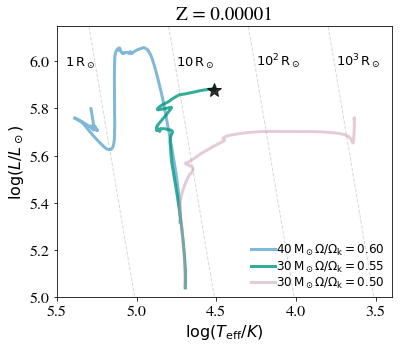

In [9]:
tt=np.arange(3,5,0.01)
ii=0
for models in MODS:
    chosen_model=DATA+models+'/LOGS/'
    h = mr.MesaData(chosen_model+'history.data')
    h1=h.center_h1
    logl=h.log_L
    logt=h.log_Teff
    loglh=h.log_LH
    model = h.model_number
    tams=find_h1(h1,model,0.1)
    plt.plot(logt,logl,linestyle='-',linewidth=3,alpha=alpha[ii],label=names[ii],color=color[ii])
    #ax.plot(logt,logl,linestyle='--',linewidth=8,color=COLORS[ii],alpha=0.5)
    #ax.plot(logt,logl,marker='s',color=BLACK,alpha=0.8,markersize=12)
    ii=ii+1
legend = plt.legend(loc='lower right',prop={'size':12})
#leg=ax.legend(loc=4,fontsize=13,scatterpoints=1)
#label=plt.legend(loc=1,fontsize=10,scatterpoints=1)
#leg.draw_frame(False)
#plt.plot(tt,np.log10(const_radius_on_hrd(10**tt,5*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.3)
tt2=np.arange(4.5,5.5,0.1)
plt.plot(tt2,np.log10(const_radius_on_hrd(10**tt2,1*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.3)
plt.plot(tt,np.log10(const_radius_on_hrd(10**tt,10*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.3)
#plt.plot(tt,np.log10(const_radius_on_hrd(10**tt,25*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.3)
#plt.plot(tt,np.log10(const_radius_on_hrd(10**tt,50*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.3)
plt.plot(tt,np.log10(const_radius_on_hrd(10**tt,100*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.3)
plt.plot(tt,np.log10(const_radius_on_hrd(10**tt,1000*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.3)

h = mr.MesaData(DATA+'30D055'+'/LOGS/'+'history.data')
h1=h.center_h1
logl=h.log_L
logt=h.log_Teff
plt.plot(logt[-1],logl[-1],marker='*',color=BLACK,alpha=0.8,markersize=14)

#plt.plot(tt,np.log10(const_radius_on_hrd(10**tt,200*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.3)

#plt.xlim([4.9,3.8])
plt.axis([5.5,3.4, 5, 6.15])
##plt.grid()
plt.xlabel(r'$\log \left( T_{\rm eff} / K \right)$')
plt.ylabel(r'$\log \left( L / L_\odot \right)$')
#plt.axis([4.2, 3.4, -0.25, 4.75])
#plt.colorbar(label=r'$\log( L_{\rm decay}/L)$')
plt.title('Z = 0.00001') #1/200 Zsun
plt.annotate(r"$1 \,\rm{R}_\odot$",(5.45,5.98),size=13)
plt.annotate(r"$10 \,\rm{R}_\odot$",(4.75,5.98),size=13)
#plt.annotate(r"$50 \rm{R}_\odot$",(4.55,5.95))
plt.annotate(r"$10^2 \,\rm{R}_\odot$",(4.25,5.98),size=13)
plt.annotate(r"$10^3 \,\rm{R}_\odot$",(3.75,5.98),size=13)

#plt.annotate(r"$10^9 \ \rm{yr}$",(3.95,1.75))
    

## Specific Angular Momentum Distribution at Core Collapse

Text(0,0.5,'$\\log$ j (cm$^2 s^{-1}$)')

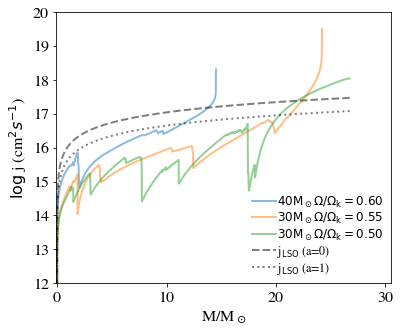

In [10]:
MODS=['40D06','30D055','30D050']#,'30D055_reduced_ST_0.1','30D055_reduced_ST_0.5','30D055_reduced_ST_after_coreH', '30D055_rot_mu1.0'] # '30D055_rot_mu1.0_after_coreH',
names=[r'$40 \rm{M}_\odot \Omega/\Omega_k = 0.60$', r'$30 \rm{M}_\odot \Omega/\Omega_k = 0.55$', r'$30 \rm{M}_\odot \Omega/\Omega_k = 0.50$',r'$30 \rm{M}_\odot \Omega/\Omega_k = 0.00$']#'40D05,'30D055','30D055 B=0 after MS','30D055 ST=0.01 after MS','30D055 ST=0.01','30D055 ST=0.1','30D055 ST=0.5']#,'30D055_reduced_ST_after_coreH','30D055_reduced_ST_0.01','30D055_reduced_ST_0.1','30D055_reduced_ST_0.5']#,'30D055_reduced_ST_0.1','30D055_reduced_ST_0.5','30D055_reduced_ST_after_coreH', '30D055_rot_mu1.0'] # '30D055_rot_mu1.0_after_coreH',
alpha=[0.5,0.8,0.5,0.5]
color=[BLUE,BLUE_GREEN,RED_PURPLE,ORANGE]

#c  = 2.99792458e10
#G  = 6.674e-8
#msun = 1.989e33
p = mr.MesaData(DATA+'30D055_reduced_ST_after_coreH/LOGS/cc.data')
rho=10**p.logRho
kappa=p.opacity
radius=p.radius
t=p.temperature
jj=p.log_j_rot
m=p.mass
#jlso=np.log10(((6.0)**0.5)*c.G*m*c.msun/c.c)
#jlsok=np.log10(c.G*m*c.msun/c.c)

ii=0
for models in MODS:
    p = mr.MesaData(DATA+models+'/LOGS/cc.data')
    jj=p.log_j_rot
    m=p.mass
    plt.plot(m,jj,linestyle='-',linewidth=2,alpha=0.5,label=names[ii])
    ii=ii+1

p = mr.MesaData(DATA+'30D050/LOGS/cc.data')
jj=p.log_j_rot
m=p.mass    
jlso=np.log10(((6.0)**0.5)*c.G*m*c.msun/c.c)
jlsok=np.log10(c.G*m*c.msun/c.c)

plt.plot(m,jlso,linestyle='--',linewidth=2,alpha=0.5,color=BLACK,label=r'j$_{\rm LSO}$ (a=0)')
plt.plot(m,jlsok,linestyle=':',linewidth=2,alpha=0.5,color=BLACK,label=r'j$_{\rm LSO}$ (a=1)')    
legend = plt.legend(loc='lower right',prop={'size':12})

#label=plt.legend(loc=1,fontsize=10,scatterpoints=1)
#leg.draw_frame(False)    
plt.axis([-0.1,30.5, 12,20])    
plt.xlabel(r'M/M$_\odot$')
plt.ylabel(r'$\log$ j (cm$^2 s^{-1}$)')

#fig = plt.figure(figsize=(10,8))
#ax = fig.add_axes([0.12, 0.10, 0.85, 0.84])

#plt.plot(m,jj,linestyle='-',linewidth=3)




Text(0,0.5,'$\\log$ j (cm$^2 s^{-1}$)')

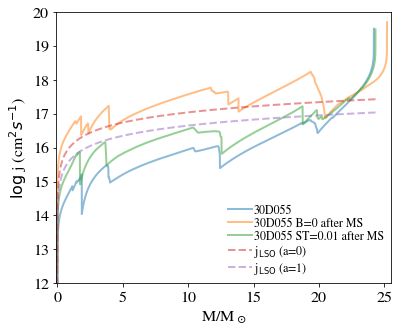

In [11]:
MODS=['30D055_RERUN','30D055_noB_after_coreH','30D055_reduced_ST_after_coreH']#,'30D055_reduced_ST_0.01','30D055_reduced_ST_0.1','30D055_reduced_ST_0.5']#,'30D055_reduced_ST_0.1','30D055_reduced_ST_0.5','30D055_reduced_ST_after_coreH', '30D055_rot_mu1.0'] # '30D055_rot_mu1.0_after_coreH',
names=['30D055','30D055 B=0 after MS','30D055 ST=0.01 after MS']#,'30D055_reduced_ST_0.01','30D055_reduced_ST_0.1','30D055_reduced_ST_0.5']#,'30D055_reduced_ST_after_coreH','30D055_reduced_ST_0.01','30D055_reduced_ST_0.1','30D055_reduced_ST_0.5']#,'30D055_reduced_ST_0.1','30D055_reduced_ST_0.5','30D055_reduced_ST_after_coreH', '30D055_rot_mu1.0'] # '30D055_rot_mu1.0_after_coreH',

#c  = 2.99792458e10
#G  = 6.674e-8
#msun = 1.989e33
p = mr.MesaData(DATA+'30D055_reduced_ST_after_coreH/LOGS/cc.data')
rho=10**p.logRho
kappa=p.opacity
radius=p.radius
t=p.temperature
jj=p.log_j_rot
m=p.mass
jlso=np.log10(((6.0)**0.5)*c.G*m*c.msun/c.c)
jlsok=np.log10(c.G*m*c.msun/c.c)


#fig = plt.figure(figsize=(10,8))
#ax = fig.add_axes([0.12, 0.10, 0.85, 0.84])

#plt.plot(m,jj,linestyle='-',linewidth=3)


ii=0
for models in MODS:
    p = mr.MesaData(DATA+models+'/LOGS/cc.data')
    jj=p.log_j_rot
    m=p.mass
    plt.plot(m,jj,linestyle='-',linewidth=2,alpha=0.5,label=names[ii])
    ii=ii+1
plt.plot(m,jlso,linestyle='--',linewidth=2,alpha=0.5,label=r'j$_{\rm LSO}$ (a=0)')
plt.plot(m,jlsok,linestyle='--',linewidth=2,alpha=0.5,label=r'j$_{\rm LSO}$ (a=1)')    
legend = plt.legend(loc='lower right',prop={'size':12})
#label=plt.legend(loc=1,fontsize=10,scatterpoints=1)
#leg.draw_frame(False)    
plt.axis([-0.1,25.5, 12,20])    
plt.xlabel(r'M/M$_\odot$')
plt.ylabel(r'$\log$ j (cm$^2 s^{-1}$)')

## Composition at Core Collapse

Text(0.5,0,'M/M$_\\odot$')

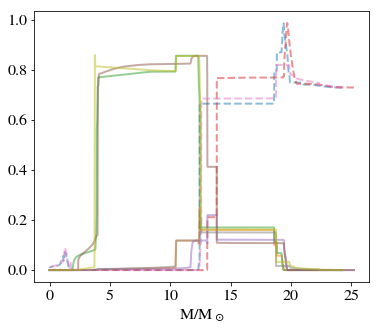

In [12]:
#fe56

ii=0
for models in MODS:
    p = mr.MesaData(DATA+models+'/LOGS/cc.data')
    fe56=p.fe56
    c12=p.c12
    o16=p.o16
    ni56=p.ni56
    si28=p.si28
    he4=p.he4
    m=p.mass
    #plt.plot(m,fe56,linestyle='-',linewidth=2,alpha=0.5,label=models)
    plt.plot(m,he4,linestyle='--',linewidth=2,alpha=0.5)
    #plt.plot(m,si28,linestyle=':',linewidth=2,alpha=0.5)
    plt.plot(m,c12,linestyle='-',linewidth=2,alpha=0.5)
    plt.plot(m,o16,linestyle='-',linewidth=2,alpha=0.5)
legend = plt.legend(loc='lower right',prop={'size':11})
plt.xlabel(r'M/M$_\odot$')
#label=plt.legend(loc=1,fontsize=10,scatterpoints=1)
#leg.draw_frame(False)    
 

[-0.1, 5, -0.1, 1.1]

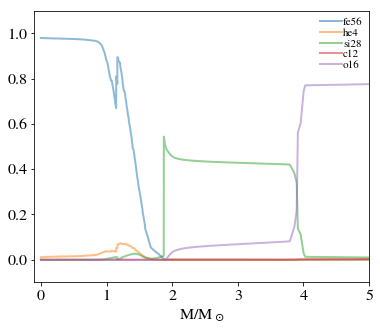

In [13]:
p = mr.MesaData(DATA+'/30D055_RERUN/LOGS/cc.data')
fe56=p.fe56
c12=p.c12
o16=p.o16
ni56=p.ni56
si28=p.si28
he4=p.he4
m=p.mass
plt.plot(m,fe56,linestyle='-',linewidth=2,alpha=0.5,label='fe56')
plt.plot(m,he4,linestyle='-',linewidth=2,alpha=0.5,label='he4')
plt.plot(m,si28,linestyle='-',linewidth=2,alpha=0.5,label='si28')
plt.plot(m,c12,linestyle='-',linewidth=2,alpha=0.5,label='c12')
plt.plot(m,o16,linestyle='-',linewidth=2,alpha=0.5,label='o16')
legend = plt.legend(loc='upper right',prop={'size':11})
plt.xlabel(r'M/M$_\odot$')
#label=plt.legend(loc=1,fontsize=10,scatterpoints=1)
#leg.draw_frame(False)    
plt.axis([-0.1,5, -0.1,1.1])    

[-0.1, 30, -0.1, 1.1]

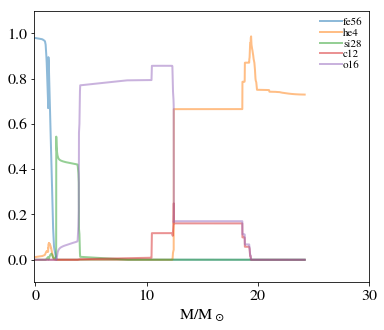

In [14]:
p = mr.MesaData(DATA+'/30D055_RERUN/LOGS/cc.data')
fe56=p.fe56
c12=p.c12
o16=p.o16
ni56=p.ni56
si28=p.si28
he4=p.he4
m=p.mass
plt.plot(m,fe56,linestyle='-',linewidth=2,alpha=0.5,label='fe56')
plt.plot(m,he4,linestyle='-',linewidth=2,alpha=0.5,label='he4')
plt.plot(m,si28,linestyle='-',linewidth=2,alpha=0.5,label='si28')
plt.plot(m,c12,linestyle='-',linewidth=2,alpha=0.5,label='c12')
plt.plot(m,o16,linestyle='-',linewidth=2,alpha=0.5,label='o16')
legend = plt.legend(loc='upper right',prop={'size':11})
plt.xlabel(r'M/M$_\odot$')
#label=plt.legend(loc=1,fontsize=10,scatterpoints=1)
#leg.draw_frame(False)    
plt.axis([-0.1,30, -0.1,1.1])    

## BH-Kerr parameters

Text(0.5,0,'M/M$_\\odot$')

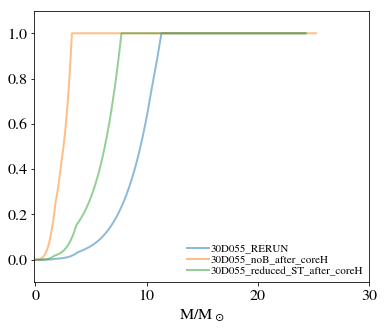

In [15]:
ii=0
for models in MODS:
    p = mr.MesaData(DATA+models+'/LOGS/cc.data')
    m=p.mass
    Jtot=10**p.log_J_inside
    jmax = c.G*m/c.msun/c.c
    a=c.G*Jtot*m/c.msun/c.c
    plt.plot(m,np.minimum(a,1.0),linestyle='-',linewidth=2,alpha=0.5,label=models)
    plt.axis([-0.1,30, -0.1,1.1])
legend = plt.legend(loc='lower right',prop={'size':11})
plt.xlabel(r'M/M$_\odot$')

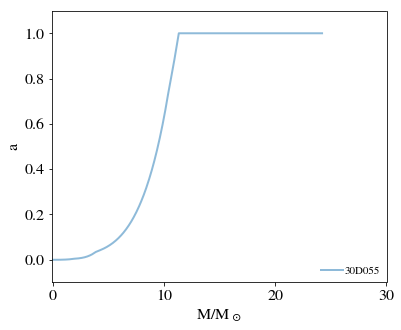

In [16]:
p = mr.MesaData(DATA+'/30D055_RERUN/LOGS/cc.data')
m=p.mass
Jtot=10**p.log_J_inside
jmax = c.G*m/c.msun/c.c
a=c.G*Jtot*m/c.msun/c.c
plt.plot(m,np.minimum(a,1.0),linestyle='-',linewidth=2,alpha=0.5,label='30D055')
plt.axis([-0.1,30, -0.1,1.1])
legend = plt.legend(loc='lower right',prop={'size':11})
plt.xlabel(r'M/M$_\odot$')
plt.ylabel(r'a')
i=0
for mm in m:
    #print(m[i],np.minimum(a[i],1.0))
    i=i+1


Text(0,0.5,'a')

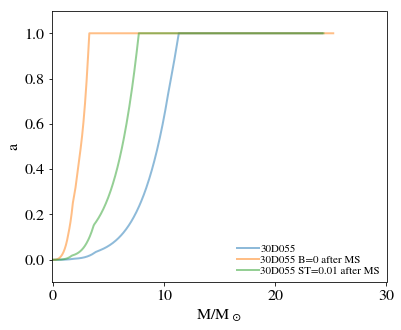

In [17]:
MODS=['30D055_RERUN','30D055_noB_after_coreH','30D055_reduced_ST_after_coreH']#,'30D055_reduced_ST_0.01','30D055_reduced_ST_0.1','30D055_reduced_ST_0.5']#,'30D055_reduced_ST_0.1','30D055_reduced_ST_0.5','30D055_reduced_ST_after_coreH', '30D055_rot_mu1.0'] # '30D055_rot_mu1.0_after_coreH',
names=['30D055','30D055 B=0 after MS','30D055 ST=0.01 after MS']#,'30D055_reduced_ST_0.01','30D055_reduced_ST_0.1','30D055_reduced_ST_0.5']#,'30D055_reduced_ST_after_coreH','30D055_reduced_ST_0.01','30D055_reduced_ST_0.1','30D055_reduced_ST_0.5']#,'30D055_reduced_ST_0.1','30D055_reduced_ST_0.5','30D055_reduced_ST_after_coreH', '30D055_rot_mu1.0'] # '30D055_rot_mu1.0_after_coreH',
ii=0
for models in MODS:
    p = mr.MesaData(DATA+models+'/LOGS/cc.data')
    m=p.mass
    Jtot=10**p.log_J_inside
    jmax = c.G*m/c.msun/c.c
    a=c.G*Jtot*m/c.msun/c.c
    plt.plot(m,np.minimum(a,1.0),linestyle='-',linewidth=2,alpha=0.5,label=names[ii])
    ii=ii+1
plt.axis([-0.1,30, -0.1,1.1])
legend = plt.legend(loc='lower right',prop={'size':11})
plt.xlabel(r'M/M$_\odot$')
plt.ylabel(r'a')


# Redo Rosalba's plots (J, Mdot and a-bh)
## Mdot as function of Time

[-1.29, 4.8, -7, 2]

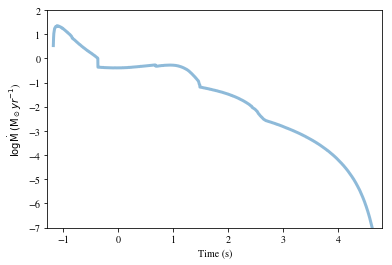

In [113]:
#data mdot25.dat
#read t 1 
#read mdot 2
#read mdot2 4
#set tt=lg(t)
#set mm=lg(mdot+1.e-8)
#set mm2=lg(mdot2+1.e-8)

# Read first and second columns (t,mdot). Plot log t, vs log mm=lg(mdot+1.e-8)
DATA='data/mdot25.dat'
dat = pandas.read_csv(DATA,delim_whitespace=True,names = ['Time', 'Mdot', 'A', 'B', 'C'])
plt.plot(np.log10(dat["Time"]),np.log10(dat['Mdot']),linewidth=2,alpha=0.5,color='BLACK')
plt.plot(np.log10(dat["Time"]),np.log10(dat['Mdot']),linewidth=8,alpha=0.5,color='')
plt.xlabel(r'Time (s)')
plt.ylabel(r'$\log \dot{\rm M} \; ({\rm M}_\odot yr^{-1}$)')
plt.axis([-1.29,4.8, -7,2]) 
#print(df.Time)

In [ ]:

f=open(DATA,"r")
lines=f.readlines()
time=[]
mdot=[]
for x in lines:
    mdot.append(x.split()[1])
    time.append(x.split()[0])
f.close()
time = np.array(time)
mdot = np.array(mdot)
print(time)
print(min(time),min(mdot))
print(max(time),max(mdot))
print(len(mdot),len(time))
t=np.log10(time)
m=np.log10(mdot)
#plt.plot(np.log10(time),np.log10(mdot),linestyle='-',linewidth=2,alpha=0.5)

#legend = plt.legend(loc='lower right',prop={'size':12})
#label=plt.legend(loc=1,fontsize=10,scatterpoints=1)
#leg.draw_frame(False)    
#plt.axis([-0.1,25.5, 12,20])    
plt.xlabel(r'Time (s)')
plt.ylabel(r'$\log \dot{M} \; (M_\odot yr^{-1}$)')